# Домашнее задание №1


Задание присылать на почту **aleksartmonov@gmail.com** в форматах *.ipynb* и отрендеренный результат в *.html*

В теме письма указать ***AU2018 HW1 <Фамилия Имя>***

soft deadline: 23.02.2018T23:59:00+0300

hard deadline: 02.03.2018T23:59:00+0300

## Теоретический блок

##### Задача 1 (3 балла)

Когда Вы заходите в темную комнату из светлого помещения, то проходит некоторое время, прежде чем Вы станете видеть достаточно хорошо, чтобы различить очертания предметов. Какая из обсуждавшихся на лекции особенностей зрительного восприятия человека объясняет это явление? Какой процесс происходит в зрительной системе?

Вероятно, это связано с яркостной адаптации и контрастной чуствительностью человеческой зрительной системы. Необходимо время, чтобы зрительная система смогла адаптироваться к новой неяркой комнате и начать различать что-либо.

##### Задача 2 (3 балла)

Рассмотрим некоторое цветовое пространство $R_{new}G_{new}B_{new}$, получающееся из исходного RGB по правилу:

$$
R_{new} = a_{11}R+a_{12}G+a_{13}B+a_{14}\\
G_{new} = a_{21}R+a_{22}G+a_{23}B+a_{24}\\
B_{new} = a_{31}R+a_{32}G+a_{33}B+a_{34}
$$

где R, G и B – вещественные числа от 0 до 1. 

Какими свойствами должны обладать коэффициенты $a_{ij}$, чтобы можно было без потерь информации переходить из одного пространства в другое и обратно?
(*) Какими свойствами должны обладать коэффициенты $a_{ij}$ , чтобы вещественные числа $R_{new},G_{new}$ и $B_{new}$ тоже лежали внутри куба со стороной 1?

1. $\det \begin{pmatrix}
a_{11} & a_{12} & a_{13} & a_{14} \\ 
a_{21} & a_{22} & a_{23} & a_{24} \\ 
a_{31} & a_{32} & a_{33} & a_{34} \\ 
0 & 0 & 0 & 1
\end{pmatrix} \neq 0$
2. $\forall j \in [1..3] ~ \sum\limits_{i = 1}^{4}{a_{ji}} = 0.25$

## Практический блок

In [1]:
import cv2
import numpy as np

from itertools import permutations

import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 9)

##### Задача 3 (3 балла)

Загрузите изображение *lena.jpg* в переменную **lena**. Отобразите результат на экран.

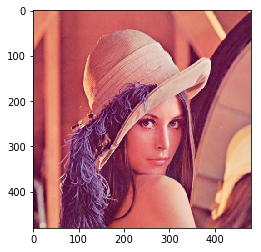

In [2]:
lena = cv2.cvtColor(cv2.imread('lena.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(lena);

##### Задача 4 (3 балла)

Поменяйте местами левую верхнюю и правую нижнюю четвертинки изображения **lena** и отобразите результат на экран.

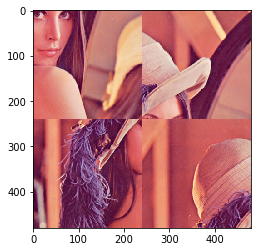

In [3]:
n, *_ = lena.shape
img = lena.copy()
img[:n // 2, :n // 2], img[n // 2:, n // 2:] = lena[n // 2:, n // 2:], lena[:n // 2, :n // 2]
plt.imshow(img);

##### Задача 5 (3 балла)

Усредните значения всех трех цветовых каналов **lena** в каждый из каналов итогового изображения **lena_gray_my**.

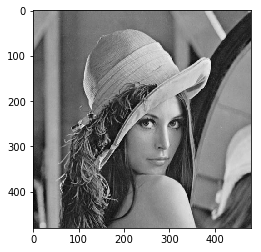

In [4]:
lena_gray_my = np.mean(lena, axis=2)
plt.imshow(lena_gray_my, cmap='gray');

##### Задача 6 (3 балла)

Переведите исходное цветное изображение **lena** в изображение в градациях серого с помощью функции cvtColor. (**lena_gray_cvt**). Вычислите модуль разности между изображениями **lena_gray_my** и **lena_gray_cvt** и отобразите ее на экране.

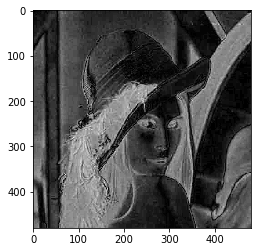

In [5]:
lena_gray_cvt = cv2.cvtColor(lena, cv2.COLOR_RGB2GRAY)
plt.imshow(np.abs(lena_gray_my - lena_gray_cvt), cmap='gray');

##### Задача 7 (3 балла)

Переведите исходное изображение **lena** из RGB в HSV. Установите значения S и V в максимум для всех пикселей изображения. Полученное изображение переведите обратно в RGB. Отобразите результат.

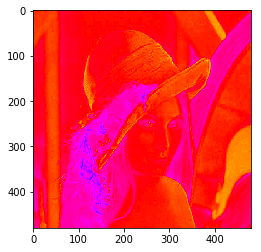

In [6]:
img = cv2.cvtColor(lena, cv2.COLOR_RGB2HSV)
img[:, :, 1], img[:, :, 2] = 255, 255
plt.imshow(cv2.cvtColor(img, cv2.COLOR_HSV2RGB));

##### Задача 8 (3 балла)
Переведите изображение **lena** в одно из цветовых пространств (cvtColor) с выделенной координатой яркости (HSV, HSL, HSB, CIE Lab), инвертируйте яркостную составляющую, переведите обратно в RGB. Отобразите результат.

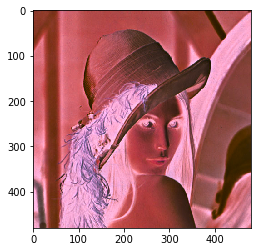

In [7]:
img = cv2.cvtColor(lena, cv2.COLOR_RGB2LAB)
img[:, :, 0] = 255 - img[:, :, 0]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_LAB2RGB));

##### Задача 9 (3 балла)

По цветному изображению **lena** на входе сгенерируйте 6 цветных изображений, полученных путем перестановки значений цветовых каналов r, g и b. исходного изображения. Соберите коллаж $3x2$ и отобразите его на экране. 

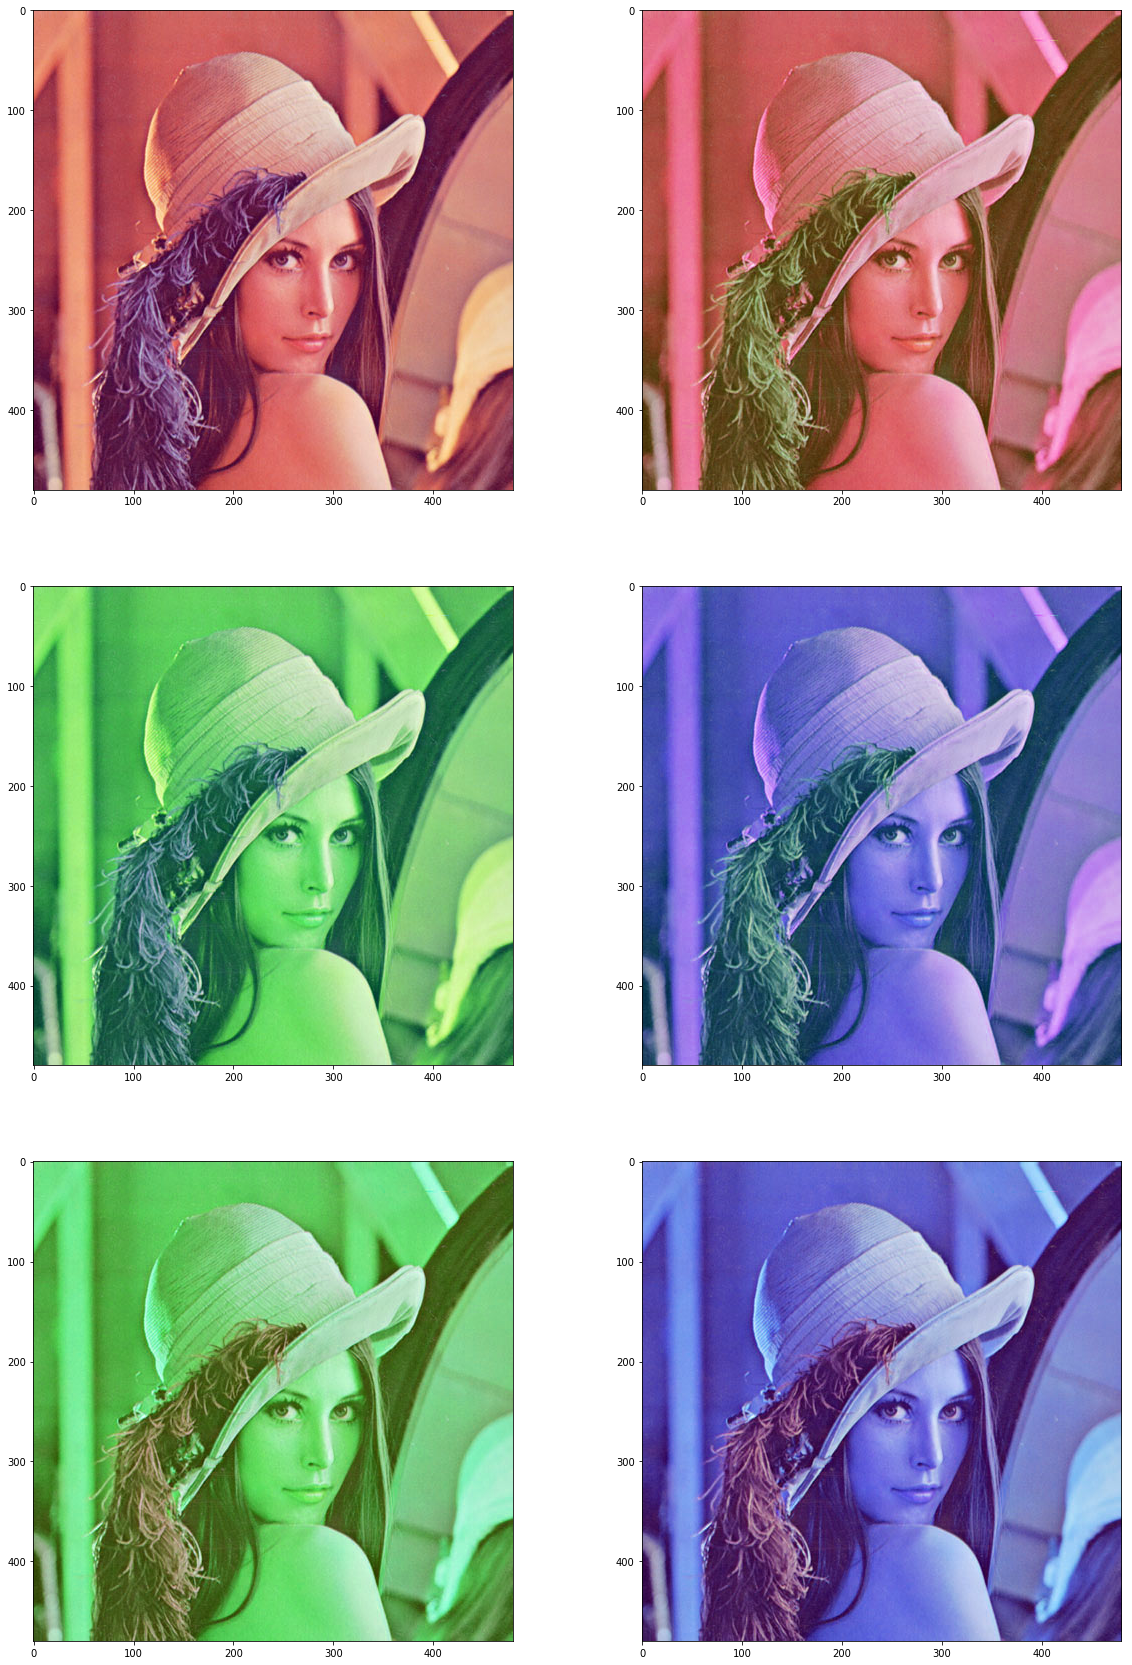

In [8]:
plt.figure(figsize=(20, 30))
for i, p in enumerate(permutations([0, 1, 2])):
    plt.subplot(321 + i)
    plt.imshow(lena[:, :, p])

##### Задача 10 (3 балла)
Переведите изображение **lena** из RGB в CIE Lab при помощи встроенной функции OpenCV. Загрузите исходное иображение еще раз и переведите из RGB в CIE Lab самостоятельно с помощью формул (google it). Сравните полученные изображения, построив разницу между ними. (Должен получится ~0)

In [9]:
def rgb_to_lab(rgb):
    eps = 0.008856
    k = 903.3
    
    r, g, b = rgb.astype(float)
    
    def pivot_rgb(val):
        if val > 0.04045:
            return np.power((val + 0.055) / 1.055, 2.4) * 100
        else:
            return val / 12.92 * 100
        
    def pivot_xyz(val):
        if val > eps:
            return np.power(val, 1. / 3)
        else:
            return (k * val + 16.) / 116
    
    r, g, b = pivot_rgb(r / 255.), pivot_rgb(g / 255.), pivot_rgb(b / 255.)
    
    x = r * 0.4124 + g * 0.3576 + b * 0.1805
    y = r * 0.2126 + g * 0.7152 + b * 0.0722
    z = r * 0.0193 + g * 0.1192 + b * 0.9505
    
    x, y, z = pivot_xyz(x / 95.047), pivot_xyz(y / 100.), pivot_xyz(z / 108.883);

    l = np.max([0, 116 * y - 16])
    a = 500 * (x - y)
    b = 200 * (y - z)
    
    # scale for opencv style
    l *= 255. / 100
    a += 128
    b += 128
    
    return np.array([l, a, b], dtype=np.uint8)

CPU times: user 9.54 s, sys: 103 ms, total: 9.64 s
Wall time: 9.93 s


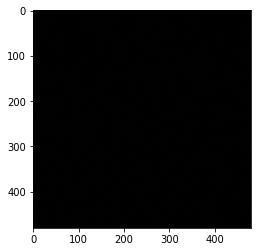

In [10]:
%%time
img1 = cv2.cvtColor(lena, cv2.COLOR_RGB2LAB)
img2 = np.apply_along_axis(rgb_to_lab, axis=2, arr=lena)
plt.imshow(np.abs(img1.astype(int) - img2.astype(int)).astype(np.uint8));